11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
750/750 [==============================] - 3s 3ms/step - loss: 0.3028 - accuracy: 0.9121 - val_loss: 0.1665 - val_accuracy: 0.9507
Epoch 2/20
750/750 [==============================] - 2s 3ms/step - loss: 0.1296 - accuracy: 0.9606 - val_loss: 0.1225 - val_accuracy: 0.9632
Epoch 3/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0891 - accuracy: 0.9731 - val_loss: 0.1040 - val_accuracy: 0.9681
Epoch 4/20
750/750 [==============================] - 2s 2ms/step - loss: 0.0665 - accuracy: 0.9792 - val_loss: 0.1006 - val_accuracy: 0.9711
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0494 - accuracy: 0.9848 - val_loss: 0.1013 - val_accuracy: 0.9721
Epoch 6/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0407 - accuracy: 0.9869 - val_loss: 0.1074 - val_accuracy: 0.9694
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.0323 - 

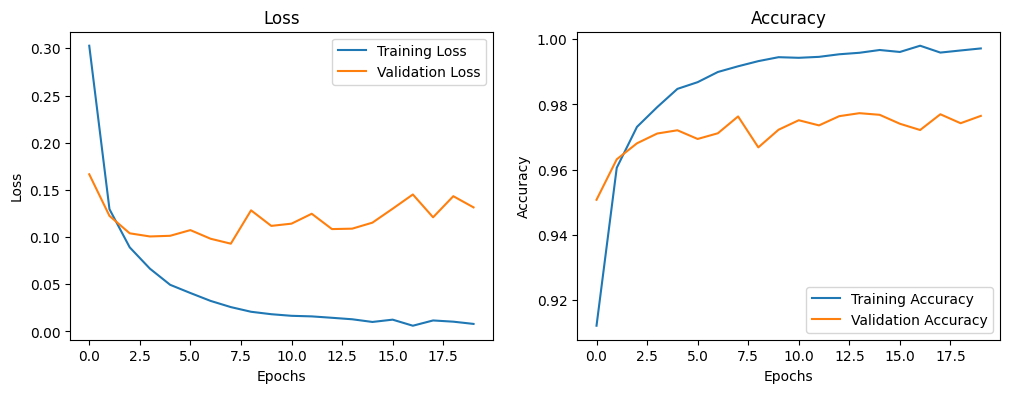

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

#Minst data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# converting labales to binary 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Design an Mlp model 
model = Sequential([
    Dense(128, activation='relu', input_shape=(28 * 28,)),
    Dense(64, activation='relu'), #activation function 
    Dense(10, activation='softmax')
])

# set optimizer 
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# train model 
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2, verbose=1)

#  Loss و Accuracy plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
